<a href="https://colab.research.google.com/github/vovizzz/ml/blob/main/6_1_Nykyforov_FIT_4_6.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train MSE: 0.5179331255246699, Test MSE: 0.5558915986952442
Train R^2: 0.6125511913966952, Test R^2: 0.575787706032451
Ridge Test MSE: 0.5558879138674184
Lasso Test MSE: 0.5482548967938964


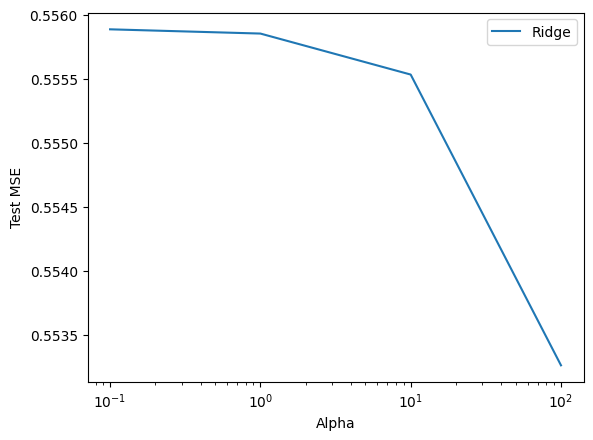

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#1
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#2
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}, Test R^2: {test_r2}")

#4
ridge = Ridge()
params_ridge = {'alpha': [0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, params_ridge, cv=5)
ridge_cv.fit(X_train, y_train)

lasso = Lasso()
params_lasso = {'alpha': [0.01, 0.1, 1, 10]}
lasso_cv = GridSearchCV(lasso, params_lasso, cv=5)
lasso_cv.fit(X_train, y_train)

y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

print(f"Ridge Test MSE: {ridge_mse}")
print(f"Lasso Test MSE: {lasso_mse}")

#5
alphas_ridge = [0.1, 1, 10, 100]
mse_ridge = []
for alpha in alphas_ridge:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse_ridge.append(mean_squared_error(y_test, y_pred))

plt.plot(alphas_ridge, mse_ridge, label="Ridge")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Test MSE")
plt.legend()
plt.show()